### 1.3. Методы последовательного уточнения приближений

In [1]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Методы последовательного уточнения приближения: метод градиентного спуска

In [2]:
# зададим функцию с несколькими экстремумами
def f(x):
    return x**2 - 10*np.sin(x)

def dfdx(x):
    return 2*x - 10*np.cos(x)

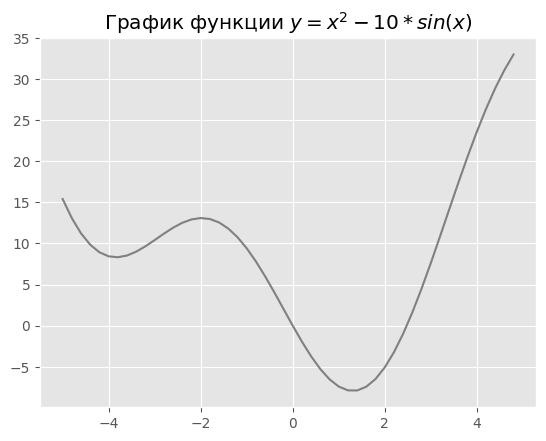

In [4]:
# Найдем графическое решение
x = np.arange(-5, 5, 0.2)
plt.plot(x, f(x), c='grey')
plt.title('График функции $y = x^2 - 10*sin(x)$')
plt.show()

In [17]:
# Зададим начальное приближение и коэф-т шага альфа
x0 = 4
alpha = 0.1
print('x0 = {:5.3f}'.format(x0), end='; ')
print('f(x) = {:5.3f}; производная: {:5.3f}'.format(f(x0), dfdx(x0)))

x0 = 4.000; f(x) = 23.568; производная: 14.536


In [18]:
# выполним одну итерацию методом градиентного спуска
print('x0 = {:5.3f}'.format(x0), end='; ')
print('f(x) = {:5.3f}; производная: {:5.3f}'.format(f(x0), dfdx(x0)))

x0 = x0 - alpha*dfdx(x0)

print('x0 = {:5.3f}'.format(x0), end='; ')
print('f(x) = {:5.3f}; производная: {:5.3f}'.format(f(x0), dfdx(x0)))

x0 = 4.000; f(x) = 23.568; производная: 14.536
x0 = 2.546; f(x) = 0.877; производная: 13.373


#### Алгоритм метода градиентного спуска

In [20]:
# Метод градиентного спуска
def grad_descent(dfdx, x0, alpha = 0.1, eps_g = 0.01):
    nf = 0
    while abs(dfdx(x0)) > eps_g:
        x0 = x0 - alpha * dfdx(x0)
        nf += 1
        if nf > 1000:
            break
    return x0, dfdx(x0), nf

In [23]:
# Найдем минимум функции методом градиентного спуска
x_opt, eps_g, nf = grad_descent(dfdx, 4)

print('Получено приближение x = {:6.3f} f(x) = {:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_g, nf))

Получено приближение x =  1.307 f(x) = -7.946 с точностью 0.0047; использовано 5 вычислений функции


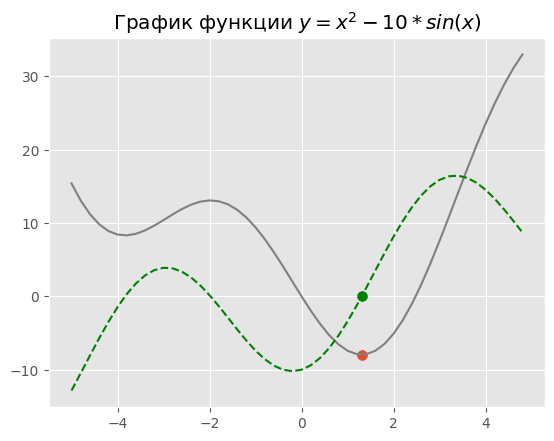

In [25]:
# Найдем графическое решение
x = np.arange(-5, 5, 0.2)
plt.plot(x, f(x), c='grey')
plt.plot(x, dfdx(x), 'g--')
plt.scatter(x_opt, f(x_opt), marker='o', s=50)
plt.scatter(x_opt, dfdx(x_opt), c = 'green', marker='o', s=50)
plt.title('График функции $y=x^2 - 10*sin(x)$')
plt.show()

In [26]:
# Найдем минимум функции методом grad_descent с большей точностью
x_opt, eps_g, nf = grad_descent(dfdx, 4, alpha=0.1, eps_g=0.001)
print('Получено приближение x = {:6.3f} f(x) = {:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_g, nf))

Получено приближение x =  1.306 f(x) = -7.946 с точностью -0.0008; использовано 6 вычислений функции


In [28]:
# Поиграемся с коэффициентом шага
x_opt, eps_g, nf = grad_descent(dfdx, 4, alpha=0.01, eps_g=0.001)
print('Получено приближение x = {:6.3f} f(x) = {:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_g, nf))
print('Точность решения по производной равна: {:6.3f}'.format(abs(dfdx(x_opt))))

Получено приближение x =  1.307 f(x) = -7.946 с точностью 0.0009; использовано 87 вычислений функции
Точность решения по производной равна:  0.001


### Метод Ньютона

In [40]:
def df2dx(x):
    return 2 + 10*np.sin(x)

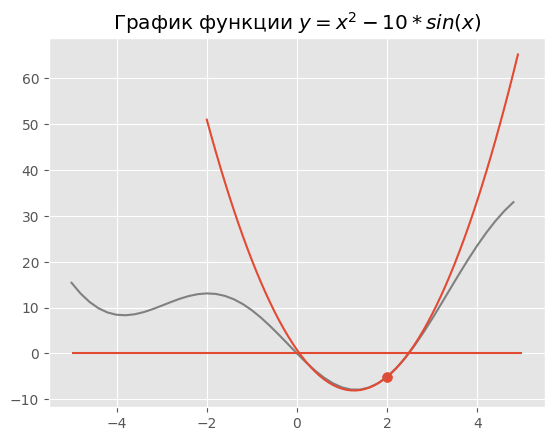

In [42]:
# Найдем графическое решение
x0 = 3
df_x0 = dfdx(x0)
df2_x0 = df2dx(x0)

# уравнение касательной
def y_line(x, x0, y0, df_dx0):
    y = y0 + df_dx0 * (x - x0)
    return y

# уравнение параболы в точке x0, которая имеет те же 1-ю и 2-ю проивзодные
def y_parab(x, x0, y0, df_dx0, df2_dx0):
    y = y0 + df_dx0 * (x - x0) + 1/2 * df2_dx0 * (x - x0)**2
    return y

x = np.arange(-5, 5, 0.2)
x1 = np.arange(-2, 5, 0.1)
plt.plot(x, f(x), c='grey')

x0 = 2
plt.plot(x1, y_parab(x1, x0, f(x0), dfdx(x0), df2dx(x0)))
plt.scatter(x = [x0], y=[f(x0)], marker='o', s=50)
plt.hlines(y=0, xmin=-5, xmax=5)
plt.title('График функции $y=x^2-10*sin(x)$')
plt.show()

In [45]:
# решаем уравнение f'(x)=0, но вместо f(x) используем уравнение параболы
# Зададим начальное приближение и коэф-т шага альфа
x0 = 2
alpha = 0.1
print('x0 = {:5.3f}'.format(x0), end='; ')
print('f(x0) = {:5.3f}, производная: {:5.3f}'.format(f(x0), dfdx(x0)))

x0 = 2.000; f(x0) = -5.093, производная: 8.161


In [46]:
# выполним одну итерацию методом Ньютона
print('x0 = {:5.3f}'.format(x0), end='; ')
print('f(x0) = {:5.3f}, производная: {:5.3f}'.format(f(x0), dfdx(x0)))

x0 = x0 - dfdx(x0)/df2dx(x0)

print('x0 = {:5.3f}'.format(x0), end='; ')
print('f(x0) = {:5.3f}, производная: {:5.3f}'.format(f(x0), dfdx(x0)))

x0 = 2.000; f(x0) = -5.093, производная: 8.161
x0 = 1.264; f(x0) = -7.935, производная: -0.489


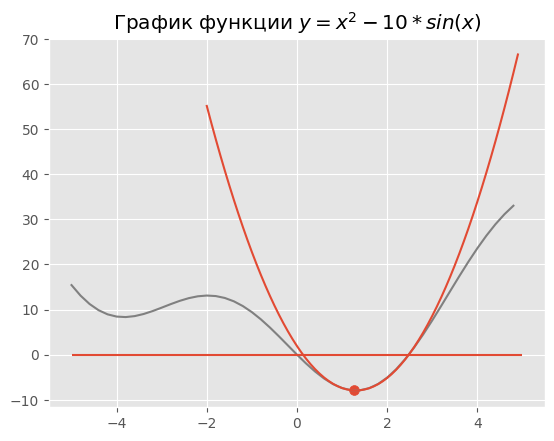

In [47]:
x = np.arange(-5, 5, 0.2)
x1 = np.arange(-2, 5, 0.1)
plt.plot(x, f(x), c='grey')

plt.plot(x1, y_parab(x1, x0, f(x0), dfdx(x0), df2dx(x0)))
plt.scatter(x = [x0], y=[f(x0)], marker='o', s=50)
plt.hlines(y=0, xmin=-5, xmax=5)
plt.title('График функции $y=x^2-10*sin(x)$')
plt.show()

In [49]:
# Метод Ньютона
def newton(dfdx, df2dx, x0, eps_g = 0.01):
    nf = 0
    while abs(dfdx(x0)) > eps_g:
        x0 = x0 - dfdx(x0)/df2dx(x0)
        nf += 2
        if nf > 1000:
            break
    return x0, dfdx(x0), nf

In [51]:
# проведем оптимизацию методом Ньютона
# Поиграемся с коэффициентом шага
x_opt, eps_g, nf = newton(dfdx, df2dx, 2, eps_g=0.001)
print('Получено приближение x = {:6.3f} f(x) = {:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_g, nf))
print('Точность решения по производной равна: {:8.7f}'.format(abs(dfdx(x_opt))))

Получено приближение x =  1.306 f(x) = -7.946 с точностью 0.0000; использовано 6 вычислений функции
Точность решения по производной равна: 0.0000001


### Метод квадратической аппроксимации

In [64]:
# Метод квадратической аппроксимации
def quadr(f, dfdx, x0, h=1, eps_g=0.001):
    nf = 0
    while abs(dfdx(x0)) > eps_g:
        a = [x0, x0+h, x0+2*h]
        f1_0 = (f(a[1]) - f(a[0])) / (a[1] - a[0])
        f1_1 = (f(a[2]) - f(a[1])) / (a[2] - a[1])
        f2 = (f1_1 - f1_0) / (a[2] - a[0])
        amin = (a[0] + a[1])/2 - f1_0/2/f2
        a.append(amin)
        flist = [f(x) for x in a]
        min_n = np.array(flist).argmin()
        if flist[min_n] < f(x0):
            x0 = a[min_n]
        else:
            h = -h/2
        nf += 3
        if nf > 1000:
            break
    return x0, dfdx(x0), nf

In [65]:
# проведем оптимизацию методом квадратической аппроксимации
x_opt, eps_g, nf = quadr(f, dfdx, x0=2, h=1, eps_g=0.001)
print('Получено приближение x = {:6.3f} f(x) = {:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_g, nf))
print('Точность решения по производной равна: {:8.7f}'.format(abs(dfdx(x_opt))))

Получено приближение x =  1.307 f(x) = -7.946 с точностью 0.0009; использовано 39 вычислений функции
Точность решения по производной равна: 0.0009090


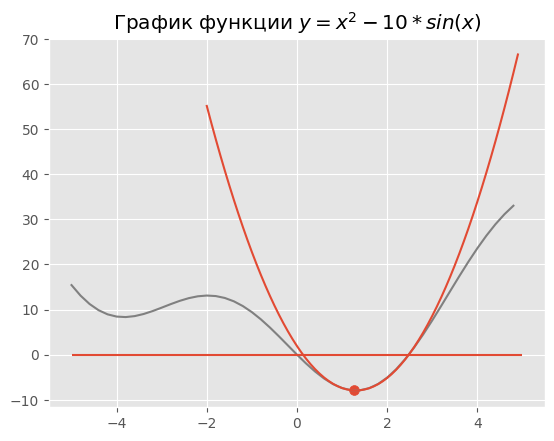

In [57]:
x = np.arange(-5, 5, 0.2)
x1 = np.arange(-2, 5, 0.1)
plt.plot(x, f(x), c='grey')

plt.plot(x1, y_parab(x1, x0, f(x0), dfdx(x0), df2dx(x0)))
plt.scatter(x = [x0], y=[f(x0)], marker='o', s=50)
plt.hlines(y=0, xmin=-5, xmax=5)
plt.title('График функции $y=x^2-10*sin(x)$')
plt.show()